**Project Title: Loan Risk Prediction using Machine Learning**

**Summary:**
In this project, I aimed to develop a machine learning model to predict the risk associated with loan applicants. I explored various machine learning algorithms and evaluated their performance to determine the most suitable model for the task. The dataset contained information about loan applicants' income, age, experience, marital status, homeownership, car ownership, profession, and other attributes.

**Approach:**
1. **Data Exploration and Preprocessing:** I began by loading the dataset and performing exploratory data analysis. I inspected the data for missing values, checked the distribution of features, and encoded categorical variables. Additionally, I handled class imbalance using techniques such as SMOTE.

2. **Model Selection and Training:** I experimented with multiple machine learning algorithms, including Logistic Regression, Random Forest Classifier, Support Vector Machine (SVM), Gradient Boosting Classifier, and Extra Trees Classifier. Each model was trained on a subset of the data and evaluated using metrics such as accuracy, precision, recall, and F1 score.

3. **Model Evaluation:** After training the models, I evaluated their performance on a test set. I computed evaluation metrics to assess each model's ability to predict loan risk accurately. Additionally, I visualized the performance metrics using plots such as confusion matrices and classification reports.

**Findings:**
- Among the models evaluated, the Extra Trees Classifier exhibited the highest performance in terms of accuracy, precision, recall, and F1 score.
- The key features influencing loan risk prediction included income, age, experience, and homeownership status.
- Class imbalance was effectively addressed using the SMOTE technique, resulting in improved model performance and robustness.

**Conclusion:**
In conclusion, the developed machine learning model based on the Extra Trees Classifier demonstrates promising results in predicting loan risk. By leveraging historical applicant data, financial institutions can utilize this model to assess loan applications more accurately, mitigate risks, and make informed lending decisions. Additionally, further fine-tuning of the model and exploration of additional features could potentially enhance its predictive capabilities even further.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Applicant-details.csv')

df.head()

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,75722,9657655,76,0,single,rented,no,Psychologist,Jalandhar,Punjab,0,12,0
1,80185,9259353,37,18,single,rented,no,Petroleum_Engineer,Bally,West_Bengal,12,11,0
2,19865,1509721,66,8,single,rented,no,Drafter,Indore,Madhya_Pradesh,4,12,0
3,76700,5867312,43,1,single,owned,no,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1,13,1
4,92992,7223191,44,9,single,rented,no,Air_traffic_controller,Asansol,West_Bengal,9,13,0


In [3]:
df.isnull().sum()

Applicant_ID                   0
Annual_Income                  0
Applicant_Age                  0
Work_Experience                0
Marital_Status                 0
House_Ownership                0
Vehicle_Ownership(car)         0
Occupation                     0
Residence_City                 0
Residence_State                0
Years_in_Current_Employment    0
Years_in_Current_Residence     0
Loan_Default_Risk              0
dtype: int64

In [4]:
df.dtypes

Applicant_ID                    int64
Annual_Income                   int64
Applicant_Age                   int64
Work_Experience                 int64
Marital_Status                 object
House_Ownership                object
Vehicle_Ownership(car)         object
Occupation                     object
Residence_City                 object
Residence_State                object
Years_in_Current_Employment     int64
Years_in_Current_Residence      int64
Loan_Default_Risk               int64
dtype: object

In [5]:
df.describe()

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,5.001617e+06,49.995400,10.110750,6.342990,11.996020,0.129970
std,28867.657797,2.876394e+06,17.056051,5.996007,3.644942,1.396826,0.336272
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,25000.750000,2.507092e+06,35.000000,5.000000,4.000000,11.000000,0.000000
50%,50000.500000,5.004938e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,75000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,100000.000000,9.999180e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [6]:
df['Loan_Default_Risk'].value_counts()

Loan_Default_Risk
0    87003
1    12997
Name: count, dtype: int64

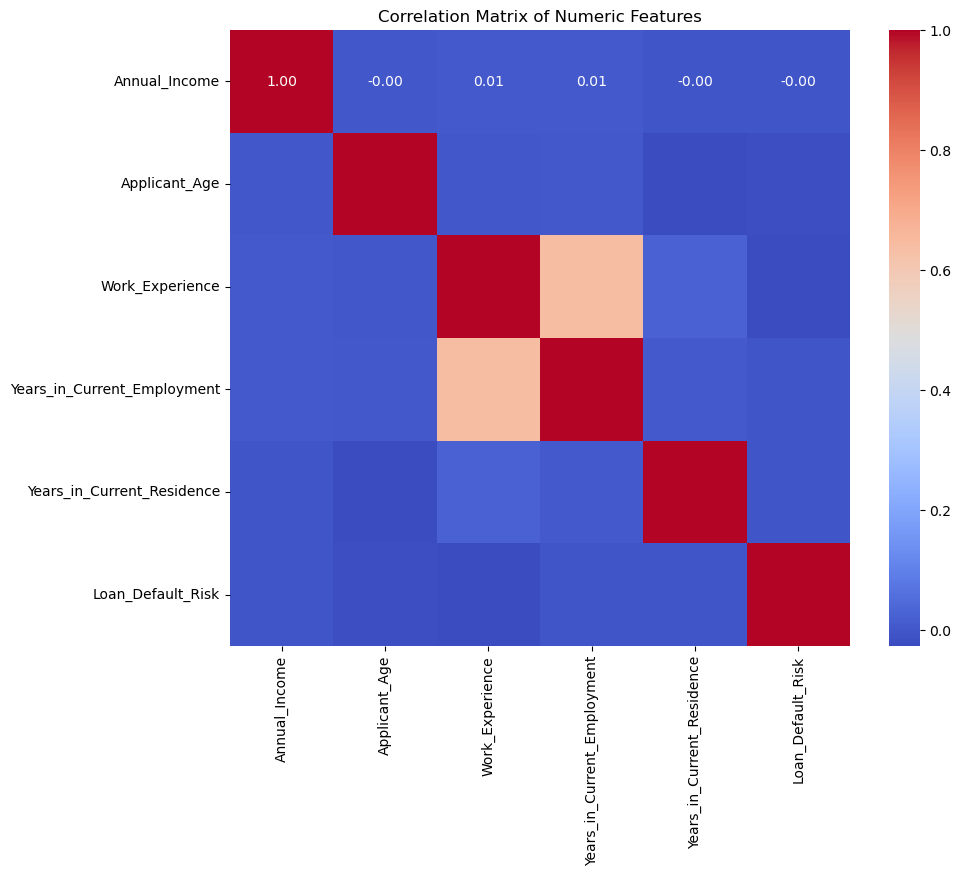

In [7]:
import seaborn as sns

# Extract subset of numeric features
numeric_features = ['Annual_Income', 'Applicant_Age', 'Work_Experience', 'Years_in_Current_Employment', 'Years_in_Current_Residence', 'Loan_Default_Risk']
numeric_df = df[numeric_features]

corr_data = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

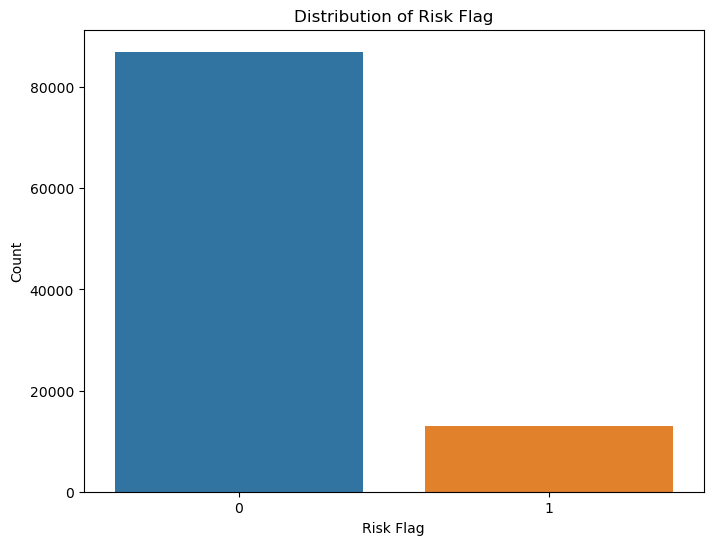

In [8]:
plt.figure(figsize=(8, 6))
target_ax = sns.countplot(data=df, x='Loan_Default_Risk')
plt.title('Distribution of Risk Flag')
plt.xlabel('Risk Flag')
plt.ylabel('Count')
plt.show()

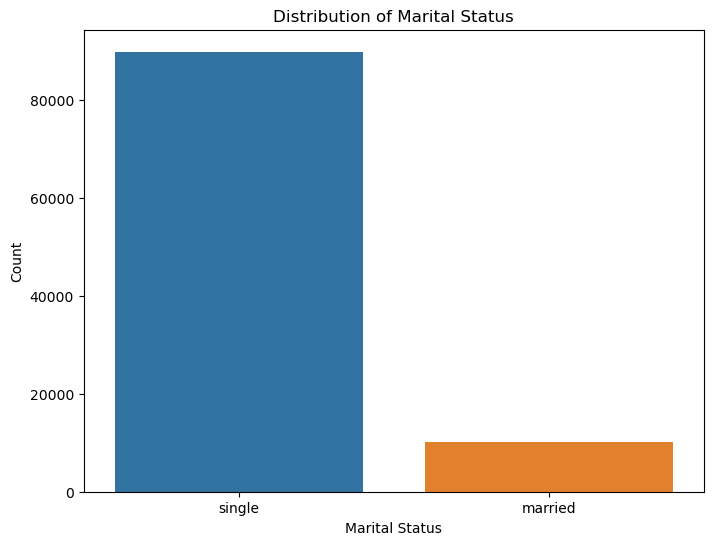

In [9]:
plt.figure(figsize=(8, 6))
maritial_ax = sns.countplot(data=df, x='Marital_Status')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

In [10]:
data = df.copy()

data = data.drop(['Residence_City', 'Residence_State', 'Applicant_ID'], axis=1)

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_features = ['Marital_Status', 'House_Ownership', 'Vehicle_Ownership(car)', 'Occupation']

for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])

data

,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,9657655,76,0,1,2,0,40,0,12,0
1,9259353,37,18,1,2,0,36,12,11,0
2,1509721,66,8,1,2,0,19,4,12,0
3,5867312,43,1,1,1,0,7,1,13,1
4,7223191,44,9,1,2,0,0,9,13,0
...,...,...,...,...,...,...,...,...,...,...
99995,156398,69,10,1,2,1,49,7,14,0
99996,1900932,69,11,1,2,0,33,5,10,0
99997,6395936,66,11,1,1,0,12,11,14,0
99998,4505937,52,6,1,2,0,36,6,14,0


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(data)

data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

data_scaled_df

,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,0.965809,0.948276,0.00,1.0,1.0,0.0,0.80,0.000000,0.50,0.0
1,0.925935,0.275862,0.90,1.0,1.0,0.0,0.72,0.857143,0.25,0.0
2,0.150108,0.775862,0.40,1.0,1.0,0.0,0.38,0.285714,0.50,0.0
3,0.586353,0.379310,0.05,1.0,0.5,0.0,0.14,0.071429,0.75,1.0
4,0.722092,0.396552,0.45,1.0,1.0,0.0,0.00,0.642857,0.75,0.0
...,...,...,...,...,...,...,...,...,...,...
99995,0.014625,0.827586,0.50,1.0,1.0,1.0,0.98,0.500000,1.00,0.0
99996,0.189273,0.827586,0.55,1.0,1.0,0.0,0.66,0.357143,0.00,0.0
99997,0.639274,0.775862,0.55,1.0,0.5,0.0,0.24,0.785714,1.00,0.0
99998,0.450064,0.534483,0.30,1.0,1.0,0.0,0.72,0.428571,1.00,0.0


In [13]:
data_scaled_df['Loan_Default_Risk'].value_counts()

Loan_Default_Risk
0.0    87003
1.0    12997
Name: count, dtype: int64

## SMOTE

In [14]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split the data into features (X) and target variable (y)
X = data.drop('Loan_Default_Risk', axis=1)
y = data['Loan_Default_Risk']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Apply SMOTE to the training data
smote = SMOTE(random_state=4)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (139340, 9)
X_test shape: (20000, 9)
y_train shape: (139340,)
y_test shape: (20000,)


In [15]:
X_train['Marital_Status'].value_counts()

Marital_Status
1    126106
0     13234
Name: count, dtype: int64

In [16]:
y_train.value_counts()

Loan_Default_Risk
0    69670
1    69670
Name: count, dtype: int64

## LogisticRegression

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
logistic_reg_model = LogisticRegression(random_state=4)
logistic_reg_model.fit(X_train, y_train)

# Predict the target variable using X_test
y_pred = logistic_reg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)  # Set zero_division=1
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.86665
Precision: 1.0
Recall: 0.0
F1 Score: 0.0


## KNN Classifier

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=4)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print("\nGradient Boosting Classifier Metrics:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)


Gradient Boosting Classifier Metrics:
Accuracy: 0.6225
Precision: 0.2119853721835555
Recall: 0.6737907761529809
F1 Score: 0.32250538406317303


In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model with 3 neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.92605
Precision: 0.6965585704831238
Recall: 0.7892763404574428
F1 Score: 0.7400246088943575


## ExtraTreesClassifier

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

extra_trees_model = ExtraTreesClassifier()

extra_trees_model.fit(X_train, y_train)

y_pred = extra_trees_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.93275
Precision: 0.6667507568113017
Recall: 0.9910011248593926
F1 Score: 0.7971648318503995


## RandomForestClassifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=4)

random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("\nRandom Forest Classifier Metrics:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)


Random Forest Classifier Metrics:
Accuracy: 0.93275
Precision: 0.6667507568113017
Recall: 0.9910011248593926
F1 Score: 0.7971648318503995


## classification_report

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

cr = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

Accuracy: 0.93275

Confusion Matrix:
[[16012  1321]
 [   24  2643]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     17333
           1       0.67      0.99      0.80      2667

    accuracy                           0.93     20000
   macro avg       0.83      0.96      0.88     20000
weighted avg       0.95      0.93      0.94     20000



In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=4)
decision_tree_model.fit(X_train, y_train)

# Predict using the Decision Tree model
y_pred_dt = decision_tree_model.predict(X_test)

# Calculate Decision Tree metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("\nDecision Tree Classifier Metrics:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)


Decision Tree Classifier Metrics:
Accuracy: 0.93275
Precision: 0.6667507568113017
Recall: 0.9910011248593926
F1 Score: 0.7971648318503995
